Single-orbital Hubbard model
============================

In this notebook you will reproduce the Bethe lattice DMFT that we did earlier with IPT,
but you will use the CTHYB solver to find the solution of the impurity problem. We will
consider the problem at half-filling again. 

In general it is a good idea to develop the script in the notebook, because it is very convenient to find bugs and to quickly come to a working code. In the beginning you should use a small number of Monte Carlo iterations (say 1000) so that the code runs quickly. Your first main goal is to have a functional script. However, once the script is done, we recommend that you do longer runs (production runs) from a shell. It will be easier for you to see the progress of the Monte Carlo solver. Think about saving the relevant data to an archive and then go back to the notebook when it comes to analyzing and plotting the results. This is usually how things are done: elaboration of the scripts and analysis of the data from the notebook, production from a shell.

In order to run your script from a shell, open a terminal and go in the tutorial directory.
This is where you should edit your production script. Let's call it `run_dmft.py`. Use your favourite editor (e.g. `vi` or `gedit`) to create the script `run_dmft.py`.

When the script is written save it and run it. You can:

- run it directly from the shell to see the Monte Carlo progress:

`>>> triqs run_dmft.py`

- run the following command in a notebook cell.

`%run run_dmft.py`

That's it! When the run is done and data has been saved into an archive, you can go back to the notebook and read the archive in order to analyze or plot the results.

In [9]:
from triqs.gf import *
from triqs.operators import *
from h5 import *
from triqs_cthyb import Solver
from numpy import *
from triqs.plot.mpl_interface import oplot,plt
from triqs.utility.redirect import *
start_redirect()

Exercise 1
----------

Write a DMFT loop, like you did earlier but using the CTHYB solver. 

*Hint*: It is useful to symmetrize the Green's function (make the `up` and `down` components the same) to avoid some artificial polarization of the system close to the Mott transition. You might want to enforce the `up`-`down` symmetry on `S.G` just before the self-consistency condition. In order
to have reasonable data you should have at least 10000 cycles.

     .... max_element |g(0) + g(beta) + 1| = 0.0177286
     .... max_element |g(0) + g(beta) + 1| = 0.649815
     .... max_element |g(0) + g(beta) + 1| = 0.834511
     .... max_element |g(0) + g(beta) + 1| = 0.268412
     .... max_element |g(0) + g(beta) + 1| = 0.360344
     .... max_element |g(0) + g(beta) + 1| = 0.223437
     .... max_element |g(0) + g(beta) + 1| = 0.662711
     .... max_element |g(0) + g(beta) + 1| = 0.280434
     .... max_element |g(0) + g(beta) + 1| = 0.0674835
     .... max_element |g(0) + g(beta) + 1| = 0.387468
     .... max_element |g(0) + g(beta) + 1| = 0.264327
     .... max_element |g(0) + g(beta) + 1| = 0.220179
     .... max_element |g(0) + g(beta) + 1| = 0.0682373
     .... max_element |g(0) + g(beta) + 1| = 0.63981
     .... max_element |g(0) + g(beta) + 1| = 0.399491
     .... max_element |g(0) + g(beta) + 1| = 1.25255
     .... max_element |g(0) + g(beta) + 1| = 0.613693
     .... max_element |g(0) + g(beta) + 1| = 0.27968
     .... max_element |g(0) 

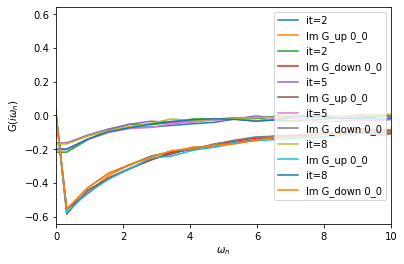

In [14]:
# Parameters of the model
t = 1.0
beta = 10
n_loops = 10
U = 4.0

# DMFT loop with self-consistency

S = Solver(beta = beta, gf_struct = [('up',[0]), ('down',[0])] )
g = GfImFreq(beta=beta,indices=[0])
# Define the non-interacting Green's function
S.G0_iw << SemiCircular(2*t)

# Define the interacting Hamiltonian
h_int = U * n('up',0) * n('down',0)

m = 3

for k in range(n_loops):
    S.solve(h_int = h_int, 
            length_cycle = 10,         # Number of steps between each measurement
            n_warmup_cycles = 5000,    # Number of warmup cycles
            n_cycles = 10000           # Number of QMC cycles
        )
    g = (S.G_iw['up']+S.G_iw['down'])/2
    S.G0_iw << iOmega_n
    S.G0_iw << inverse(S.G0_iw -t**2*g)
    if k%m==m-1:
        oplot(S.G_iw,label=f"it={k}")
plt.xlim(0,10)
plt.show()

Exercise 2
----------

Here, you will learn to analyze the output of the solver. As discussed, the Monte Carlo algorithm provide results on the
Matsubara axis. This makes the analysis of the results slightly more delicate than if we had them directly on the real
axis. When we used the IPT solver, we could see the Mott transition as the appearance of a gap in the spectral function.
After the Monte Carlo run, we do not have the spectral function, so we will have to use some other criteria to decide, e.g.,
if the system is metallic or insulating.

Plot the Green's function at the end of the DMFT loops for several values of $U$ (say between 2 and 8). Focus on the extrapolation of the imaginary part of the Green's function to zero frequency. How does it change with $U$? Is there
a way to see the Mott transition just by inspecting the imaginary part of the Green's function?

     .... max_element |g(0) + g(beta) + 1| = 0.163868
     .... max_element |g(0) + g(beta) + 1| = 0.125117
     .... max_element |g(0) + g(beta) + 1| = 0.41696
     .... max_element |g(0) + g(beta) + 1| = 0.061177
     .... max_element |g(0) + g(beta) + 1| = 0.404656
     .... max_element |g(0) + g(beta) + 1| = 0.512946
     .... max_element |g(0) + g(beta) + 1| = 1.36014
     .... max_element |g(0) + g(beta) + 1| = 0.492484
     .... max_element |g(0) + g(beta) + 1| = 0.51996
     .... max_element |g(0) + g(beta) + 1| = 0.113231
     .... max_element |g(0) + g(beta) + 1| = 0.400093
     .... max_element |g(0) + g(beta) + 1| = 0.509038
     .... max_element |g(0) + g(beta) + 1| = 0.980812
     .... max_element |g(0) + g(beta) + 1| = 0.194555
     .... max_element |g(0) + g(beta) + 1| = 0.382659
     .... max_element |g(0) + g(beta) + 1| = 0.275692
     .... max_element |g(0) + g(beta) + 1| = 0.560582
     .... max_element |g(0) + g(beta) + 1| = 0.383751
     .... max_element |g(0) + g

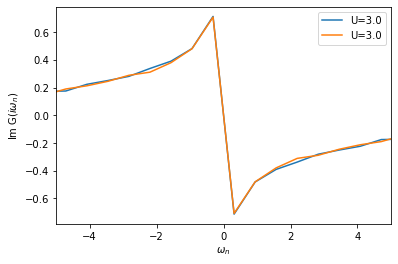

     .... max_element |g(0) + g(beta) + 1| = 0.0177286
     .... max_element |g(0) + g(beta) + 1| = 0.649815
     .... max_element |g(0) + g(beta) + 1| = 0.0805859
     .... max_element |g(0) + g(beta) + 1| = 0.628923
     .... max_element |g(0) + g(beta) + 1| = 0.138547
     .... max_element |g(0) + g(beta) + 1| = 0.084757
     .... max_element |g(0) + g(beta) + 1| = 1.31262
     .... max_element |g(0) + g(beta) + 1| = 0.885022
     .... max_element |g(0) + g(beta) + 1| = 0.292991
     .... max_element |g(0) + g(beta) + 1| = 0.641105
     .... max_element |g(0) + g(beta) + 1| = 0.279869
     .... max_element |g(0) + g(beta) + 1| = 1
     .... max_element |g(0) + g(beta) + 1| = 0.605154
     .... max_element |g(0) + g(beta) + 1| = 0.937761
     .... max_element |g(0) + g(beta) + 1| = 0.255633
     .... max_element |g(0) + g(beta) + 1| = 0.714159
     .... max_element |g(0) + g(beta) + 1| = 1.61535
     .... max_element |g(0) + g(beta) + 1| = 0.791258
     .... max_element |g(0) + g(bet

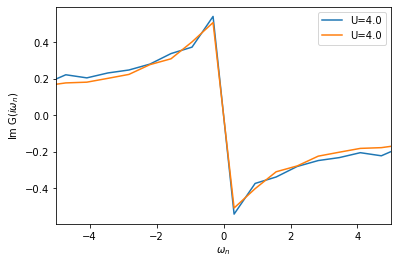

     .... max_element |g(0) + g(beta) + 1| = 0.607488
     .... max_element |g(0) + g(beta) + 1| = 0.3576
     .... max_element |g(0) + g(beta) + 1| = 0.37297
     .... max_element |g(0) + g(beta) + 1| = 0.566213
     .... max_element |g(0) + g(beta) + 1| = 0.580447
     .... max_element |g(0) + g(beta) + 1| = 2.65216
     .... max_element |g(0) + g(beta) + 1| = 0.306993
     .... max_element |g(0) + g(beta) + 1| = 0.231178
     .... max_element |g(0) + g(beta) + 1| = 0.251401
     .... max_element |g(0) + g(beta) + 1| = 0.58086
     .... max_element |g(0) + g(beta) + 1| = 0.486657
     .... max_element |g(0) + g(beta) + 1| = 0.848128
     .... max_element |g(0) + g(beta) + 1| = 0.774898
     .... max_element |g(0) + g(beta) + 1| = 0.125456
     .... max_element |g(0) + g(beta) + 1| = 1.10748
     .... max_element |g(0) + g(beta) + 1| = 0.89411
     .... max_element |g(0) + g(beta) + 1| = 0.632829
     .... max_element |g(0) + g(beta) + 1| = 2.47646
     .... max_element |g(0) + g(beta

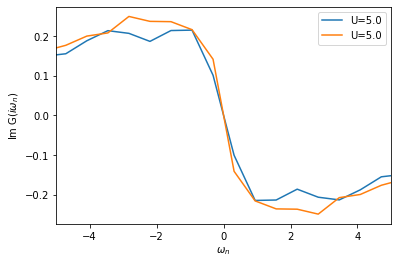

     .... max_element |g(0) + g(beta) + 1| = 0.297362
     .... max_element |g(0) + g(beta) + 1| = 0.35455
     .... max_element |g(0) + g(beta) + 1| = 0.548041
     .... max_element |g(0) + g(beta) + 1| = 0.941401
     .... max_element |g(0) + g(beta) + 1| = 0.0347028
     .... max_element |g(0) + g(beta) + 1| = 0.377755
     .... max_element |g(0) + g(beta) + 1| = 1
     .... max_element |g(0) + g(beta) + 1| = 0.261473
     .... max_element |g(0) + g(beta) + 1| = 0.577621
     .... max_element |g(0) + g(beta) + 1| = 0.260094
     .... max_element |g(0) + g(beta) + 1| = 0.634315
     .... max_element |g(0) + g(beta) + 1| = 0.316039
     .... max_element |g(0) + g(beta) + 1| = 0.899151
     .... max_element |g(0) + g(beta) + 1| = 0.894428
     .... max_element |g(0) + g(beta) + 1| = 0.288182
     .... max_element |g(0) + g(beta) + 1| = 0.470365
     .... max_element |g(0) + g(beta) + 1| = 0.118786
     .... max_element |g(0) + g(beta) + 1| = 0.390928
     .... max_element |g(0) + g(bet

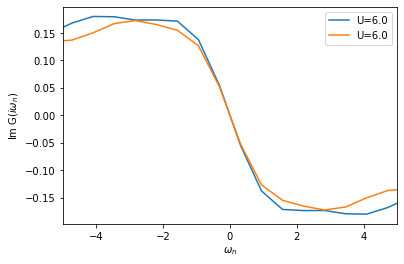

     .... max_element |g(0) + g(beta) + 1| = 0.383139
     .... max_element |g(0) + g(beta) + 1| = 0.165608
     .... max_element |g(0) + g(beta) + 1| = 0.934084
     .... max_element |g(0) + g(beta) + 1| = 0.066619
     .... max_element |g(0) + g(beta) + 1| = 0.746929
     .... max_element |g(0) + g(beta) + 1| = 0.532387
     .... max_element |g(0) + g(beta) + 1| = 0.515459
     .... max_element |g(0) + g(beta) + 1| = 0.485561
     .... max_element |g(0) + g(beta) + 1| = 0.856526
     .... max_element |g(0) + g(beta) + 1| = 0.134007
     .... max_element |g(0) + g(beta) + 1| = 0.389686
     .... max_element |g(0) + g(beta) + 1| = 0.808989
     .... max_element |g(0) + g(beta) + 1| = 0.117163
     .... max_element |g(0) + g(beta) + 1| = 0.502063
     .... max_element |g(0) + g(beta) + 1| = 1
     .... max_element |g(0) + g(beta) + 1| = 0.140236
     .... max_element |g(0) + g(beta) + 1| = 0.877351
     .... max_element |g(0) + g(beta) + 1| = 0.723991
     .... max_element |g(0) + g(bet

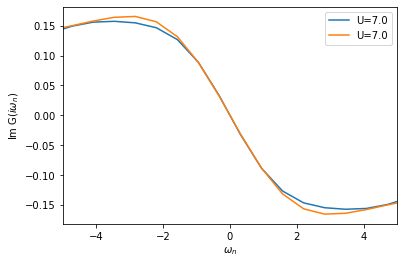

In [16]:
# Parameters of the model
t = 1.0
beta = 10
n_loops = 10

# DMFT loop with self-consistency

S = Solver(beta = beta, gf_struct = [('up',[0]), ('down',[0])] )

for U in linspace(3,7,5):

    # Define the non-interacting Green's function
    S.G0_iw << SemiCircular(2*t)

    # Define the interacting Hamiltonian
    h_int = U * n('up',0) * n('down',0)

    for k in range(n_loops):
        S.solve(h_int = h_int, 
                length_cycle = 10,         # Number of steps between each measurement
                n_warmup_cycles = 5000,    # Number of warmup cycles
                n_cycles = 10000           # Number of QMC cycles
            )
        g = (S.G_iw['up']+S.G_iw['down'])/2
        S.G0_iw << iOmega_n
        S.G0_iw << inverse(S.G0_iw+U/2 -t**2*g)
    oplot(S.G_iw.imag,label=f"U={U}")
    plt.xlim(-5,5)
    plt.show()

Exercise 3
----------

Do the same exercise as above, but analyze the self-energy. The noise usually gets bigger for larger frequencies, so just focus on the first few Matsubara frequencies. There the noise should not be too important. Again, by looking at the extrapolation to zero frequency of the imaginary part of the self-energy, can you tell where the Mott transition happens?

     .... max_element |g(0) + g(beta) + 1| = 0.280407
     .... max_element |g(0) + g(beta) + 1| = 0.158578
     .... max_element |g(0) + g(beta) + 1| = 0.5332
     .... max_element |g(0) + g(beta) + 1| = 0.0998672
     .... max_element |g(0) + g(beta) + 1| = 0.16011
     .... max_element |g(0) + g(beta) + 1| = 0.294754
     .... max_element |g(0) + g(beta) + 1| = 0.128245
     .... max_element |g(0) + g(beta) + 1| = 0.34383
     .... max_element |g(0) + g(beta) + 1| = 0.318179
     .... max_element |g(0) + g(beta) + 1| = 0.017494
     .... max_element |g(0) + g(beta) + 1| = 0.498331
     .... max_element |g(0) + g(beta) + 1| = 0.143285
     .... max_element |g(0) + g(beta) + 1| = 0.0874139
     .... max_element |g(0) + g(beta) + 1| = 0.266916
     .... max_element |g(0) + g(beta) + 1| = 0.0239632
     .... max_element |g(0) + g(beta) + 1| = 0.181751
     .... max_element |g(0) + g(beta) + 1| = 0.0240688
     .... max_element |g(0) + g(beta) + 1| = 0.316185
     .... max_element |g(0) 

---------------- U=2.0----------------


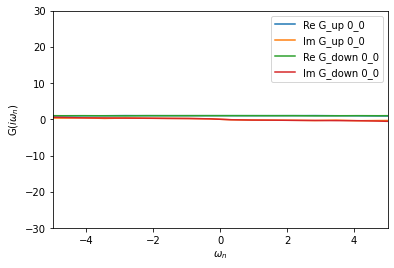

     .... max_element |g(0) + g(beta) + 1| = 0.192402
     .... max_element |g(0) + g(beta) + 1| = 0.240814
     .... max_element |g(0) + g(beta) + 1| = 0.0936714
     .... max_element |g(0) + g(beta) + 1| = 0.24031
     .... max_element |g(0) + g(beta) + 1| = 0.273598
     .... max_element |g(0) + g(beta) + 1| = 0.258625
     .... max_element |g(0) + g(beta) + 1| = 0.0985767
     .... max_element |g(0) + g(beta) + 1| = 0.0138527
     .... max_element |g(0) + g(beta) + 1| = 0.107079
     .... max_element |g(0) + g(beta) + 1| = 0.507852
     .... max_element |g(0) + g(beta) + 1| = 0.224667
     .... max_element |g(0) + g(beta) + 1| = 0.255378
     .... max_element |g(0) + g(beta) + 1| = 0.0915698
     .... max_element |g(0) + g(beta) + 1| = 0.026341
     .... max_element |g(0) + g(beta) + 1| = 0.360412
     .... max_element |g(0) + g(beta) + 1| = 0.0529234
     .... max_element |g(0) + g(beta) + 1| = 0.1042
     .... max_element |g(0) + g(beta) + 1| = 0.412187


---------------- U=3.0----------------


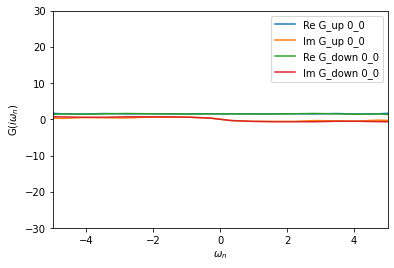

     .... max_element |g(0) + g(beta) + 1| = 0.0426086
     .... max_element |g(0) + g(beta) + 1| = 0.138158
     .... max_element |g(0) + g(beta) + 1| = 0.350692
     .... max_element |g(0) + g(beta) + 1| = 0.399213
     .... max_element |g(0) + g(beta) + 1| = 0.512869
     .... max_element |g(0) + g(beta) + 1| = 0.120484
     .... max_element |g(0) + g(beta) + 1| = 0.513238
     .... max_element |g(0) + g(beta) + 1| = 0.227125
     .... max_element |g(0) + g(beta) + 1| = 0.0523716
     .... max_element |g(0) + g(beta) + 1| = 0.308496
     .... max_element |g(0) + g(beta) + 1| = 0.0145673
     .... max_element |g(0) + g(beta) + 1| = 0.293873
     .... max_element |g(0) + g(beta) + 1| = 0.684524
     .... max_element |g(0) + g(beta) + 1| = 0.176043
     .... max_element |g(0) + g(beta) + 1| = 0.268347
     .... max_element |g(0) + g(beta) + 1| = 0.414598
     .... max_element |g(0) + g(beta) + 1| = 0.117047
     .... max_element |g(0) + g(beta) + 1| = 0.241431
     .... max_element |g(

---------------- U=4.0----------------


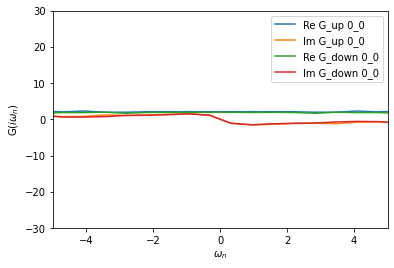

     .... max_element |g(0) + g(beta) + 1| = 0.0722328
     .... max_element |g(0) + g(beta) + 1| = 0.302368
     .... max_element |g(0) + g(beta) + 1| = 0.201199
     .... max_element |g(0) + g(beta) + 1| = 0.0904876
     .... max_element |g(0) + g(beta) + 1| = 0.344614
     .... max_element |g(0) + g(beta) + 1| = 0.0353138
     .... max_element |g(0) + g(beta) + 1| = 0.219327
     .... max_element |g(0) + g(beta) + 1| = 0.0264031
     .... max_element |g(0) + g(beta) + 1| = 0.0604093
     .... max_element |g(0) + g(beta) + 1| = 0.244063
     .... max_element |g(0) + g(beta) + 1| = 0.189371
     .... max_element |g(0) + g(beta) + 1| = 0.0301647
     .... max_element |g(0) + g(beta) + 1| = 0.494046
     .... max_element |g(0) + g(beta) + 1| = 0.330284
     .... max_element |g(0) + g(beta) + 1| = 0.505999
     .... max_element |g(0) + g(beta) + 1| = 0.602033
     .... max_element |g(0) + g(beta) + 1| = 0.542532
     .... max_element |g(0) + g(beta) + 1| = 0.478993
     .... max_element 

---------------- U=5.0----------------


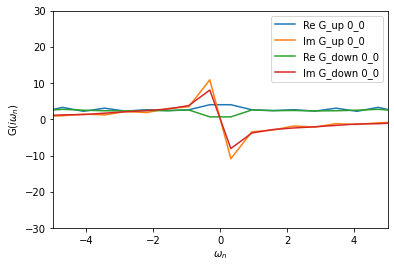

     .... max_element |g(0) + g(beta) + 1| = 0.0297771
     .... max_element |g(0) + g(beta) + 1| = 0.29405
     .... max_element |g(0) + g(beta) + 1| = 0.0759964
     .... max_element |g(0) + g(beta) + 1| = 0.0119955
     .... max_element |g(0) + g(beta) + 1| = 0.170187
     .... max_element |g(0) + g(beta) + 1| = 0.0612007
     .... max_element |g(0) + g(beta) + 1| = 0.0860037
     .... max_element |g(0) + g(beta) + 1| = 0.343078
     .... max_element |g(0) + g(beta) + 1| = 0.253624
     .... max_element |g(0) + g(beta) + 1| = 0.0381271
     .... max_element |g(0) + g(beta) + 1| = 0.344169
     .... max_element |g(0) + g(beta) + 1| = 0.21549
     .... max_element |g(0) + g(beta) + 1| = 0.314216
     .... max_element |g(0) + g(beta) + 1| = 0.282318
     .... max_element |g(0) + g(beta) + 1| = 0.173201
     .... max_element |g(0) + g(beta) + 1| = 0.296198
     .... max_element |g(0) + g(beta) + 1| = 0.103834
     .... max_element |g(0) + g(beta) + 1| = 0.546637
     .... max_element |g

---------------- U=6.0----------------


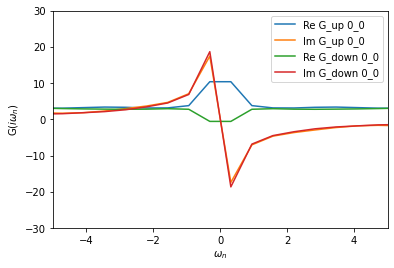

     .... max_element |g(0) + g(beta) + 1| = 0.309368
     .... max_element |g(0) + g(beta) + 1| = 0.576833
     .... max_element |g(0) + g(beta) + 1| = 0.0212576
     .... max_element |g(0) + g(beta) + 1| = 0.0734196
     .... max_element |g(0) + g(beta) + 1| = 0.0126919
     .... max_element |g(0) + g(beta) + 1| = 0.342498
     .... max_element |g(0) + g(beta) + 1| = 0.0157561
     .... max_element |g(0) + g(beta) + 1| = 0.184729
     .... max_element |g(0) + g(beta) + 1| = 0.200132
     .... max_element |g(0) + g(beta) + 1| = 0.313981
     .... max_element |g(0) + g(beta) + 1| = 0.147348
     .... max_element |g(0) + g(beta) + 1| = 0.189815
     .... max_element |g(0) + g(beta) + 1| = 0.182783
     .... max_element |g(0) + g(beta) + 1| = 0.415971
     .... max_element |g(0) + g(beta) + 1| = 0.380708
     .... max_element |g(0) + g(beta) + 1| = 0.0680744
     .... max_element |g(0) + g(beta) + 1| = 0.210288
     .... max_element |g(0) + g(beta) + 1| = 0.396786
     .... max_element |

---------------- U=7.0----------------


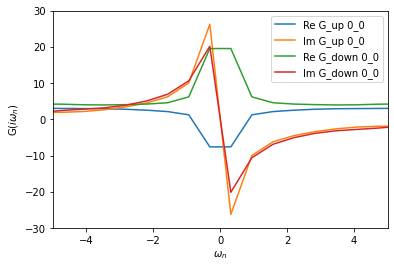

     .... max_element |g(0) + g(beta) + 1| = 0.242728
     .... max_element |g(0) + g(beta) + 1| = 0.305582
     .... max_element |g(0) + g(beta) + 1| = 0.0536575
     .... max_element |g(0) + g(beta) + 1| = 0.693508
     .... max_element |g(0) + g(beta) + 1| = 0.161305
     .... max_element |g(0) + g(beta) + 1| = 0.275036
     .... max_element |g(0) + g(beta) + 1| = 0.334738
     .... max_element |g(0) + g(beta) + 1| = 0.0131284
     .... max_element |g(0) + g(beta) + 1| = 0.0643607
     .... max_element |g(0) + g(beta) + 1| = 0.025761
     .... max_element |g(0) + g(beta) + 1| = 0.633989
     .... max_element |g(0) + g(beta) + 1| = 0.362503
     .... max_element |g(0) + g(beta) + 1| = 0.316675
     .... max_element |g(0) + g(beta) + 1| = 0.248394
     .... max_element |g(0) + g(beta) + 1| = 0.161275
     .... max_element |g(0) + g(beta) + 1| = 0.0298999
     .... max_element |g(0) + g(beta) + 1| = 0.6305
     .... max_element |g(0) + g(beta) + 1| = 0.0780527
     .... max_element |g(

---------------- U=8.0----------------


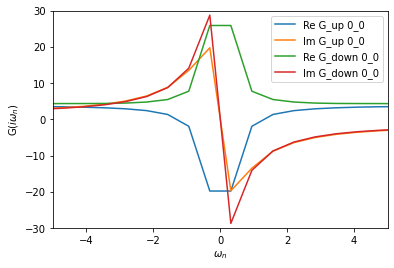

In [22]:
# Parameters of the model
t = 1.0
beta = 10
n_loops = 10

# DMFT loop with self-consistency

S = Solver(beta = beta, gf_struct = [('up',[0]), ('down',[0])] )

for U in linspace(2,8,7):

    # Define the non-interacting Green's function
    S.G0_iw << SemiCircular(2*t)

    # Define the interacting Hamiltonian
    h_int = U * n('up',0) * n('down',0)

    for k in range(n_loops):
        S.solve(h_int = h_int, 
                length_cycle = 10,         # Number of steps between each measurement
                n_warmup_cycles = 5000,    # Number of warmup cycles
                n_cycles = 50000           # Number of QMC cycles
            )
        g = (S.G_iw['up']+S.G_iw['down'])/2
        S.G0_iw << iOmega_n
        S.G0_iw << inverse(S.G0_iw+U/2 -t**2*g)
    print(f'---------------- U={U}----------------')
    oplot(S.Sigma_iw)
    plt.xlim(-5,5)
    plt.ylim(-30,30)
    plt.show()

Exercise 4
----------

A very useful quantity to measure the degree of correlation of a metal is the *quasiparticle weight* $Z$. It is defined as

$$
Z = \lim_{\omega_n \rightarrow 0} \Big( 1 - \frac{d\mathrm{Im} \Sigma(i\omega_n)}{di\omega_n} \Big)^{-1}
$$


For a non-interacting metal $Z=1$. As correlations appear, $Z$ gradually gets smaller. It reaches 0 at the Mott transition. Make a plot of $Z$ versus $U$ for the Bethe lattice Hubbard model. 

*Hint*: In order to have access to the values of $\Sigma_\uparrow(i\omega_n)$, you can use `S.Sigma['up'](n)`. This will be useful to numerically compute the derivative required to compute $Z$.

Exercise 5
----------

Go back to your IPT code and try to modify it to extract the $Z$ versus $U$ curve. Compare this to the result you found in Exercise 4. Is the critical $U$ for the Mott transition similar to the one you found using CTHYB?

Exercise 6
----------

Try to analytically continue the Green's function on the real axis using the Pade approximation. What can
you say about the result?